In [ ]:
#Dataframe Creation
import pandas as pd
url = 'https://raw.githubusercontent.com/ipd2022/Project/main/MumbaiMonthly.csv'
dataset = pd.read_csv(url)
dataset.head()

,Year,Location,Latitude,Longitude,Month,Temperature,Min Temp,Max Temp,Relative humidity,Specific humidity,Precipitation,Dengue Cases,Dengue Deaths
0,2016,Mumbai,19.0761,72.8774,1,23.50,13.05,37.51,45.50,7.57,0.01,21,1
1,2016,Mumbai,19.0761,72.8774,2,25.69,15.20,38.77,50.56,9.52,0.72,23,0
2,2016,Mumbai,19.0761,72.8774,3,29.19,19.51,42.69,47.94,10.80,0.10,22,0
3,2016,Mumbai,19.0761,72.8774,4,30.54,22.00,41.65,53.75,13.37,0.06,21,0
4,2016,Mumbai,19.0761,72.8774,5,31.47,24.36,40.37,61.38,17.03,0.30,27,0


In [ ]:
#Splitting into Train test
dataset.drop(dataset.columns[12], axis=1, inplace=True)
X = dataset.iloc[0 : 72 , 5 : 11]
y = dataset.iloc[0 : 72, -1]

In [ ]:
from sklearn.svm import NuSVR

model = NuSVR(kernel = "poly", degree = 6)
model.fit(X, y)
test = dataset.iloc[72 : , 5 : 11]
print(model.predict(test))

[ 23.01616829  15.50413617  10.38233935  12.10442177  21.52633659
  31.1512541   49.09580702 142.26746189 121.99769128  90.1994948
  72.33146112  52.7931299 ]


In [ ]:
from sklearn.metrics import mean_squared_error

test1 = dataset.iloc[72 : , -1]
y_pred = model.predict(test)
mean_squared_error(test1, y_pred)

2860.0561892100764

In [ ]:
#Predict 2023
x = dataset.iloc[0 : , 5 : 11]
Y = dataset.iloc[0 : , -1]

url1 = 'https://raw.githubusercontent.com/ipd2022/Project/main/Mumbai_2023.csv'
df = pd.read_csv(url1)

model.fit(x, Y)
X_test = df.iloc[0 : , 2 : 8]
print(model.predict(X_test))

[ 25.06678664  16.10926773   8.55381526  14.334009    24.57525674
  43.90527725  41.16879988 109.92926095 136.54068934 113.74559527
  70.81960341  48.58692674]


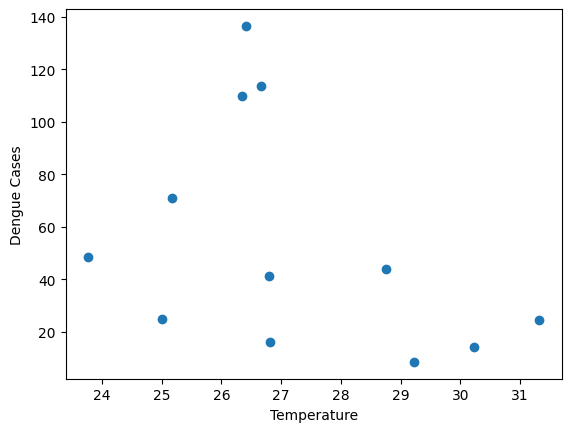

In [ ]:
import matplotlib.pyplot as plt

x1 = df.iloc[0 : , 2]
y = model.predict(X_test)
plt.scatter(x1, y)
plt.xlabel("Temperature")
plt.ylabel("Dengue Cases")
plt.show()

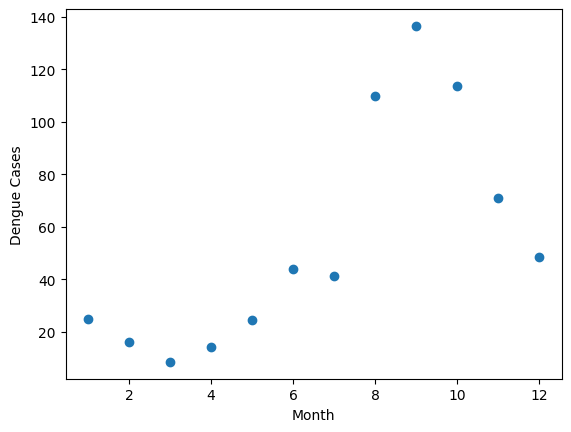

In [ ]:
x2 = df.iloc[0 : , 1]
y = model.predict(X_test)
plt.scatter(x2, y)
plt.xlabel("Month")
plt.ylabel("Dengue Cases")
plt.show()